<h1> ETL </h1>
<h4> EXTRAER TRANSFORMAR CARGAR </h4>

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Carga de datasets

In [2]:
hechos= pd.read_excel('../Datasets/homicidios.xlsx', sheet_name=None)
lesiones= pd.read_excel('../Datasets/lesiones.xlsx')

<h4>Exproracion DataSet homicidios</h4>
Pestaña hechos

In [3]:
hechos['HECHOS'].sample(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
87,2016-0114,1,2016-08-31,2016,8,31,11:20:00,11,SALGUERO 1410,CALLE,...,1410.0,NaN,"SALGUERO, JERONIMO 1410",14,Point (104111.05146856 103917.57944765),-58.41848605,-34.59394733,BICICLETA-CARGAS,BICICLETA,CARGAS
584,2020-0065,1,2020-12-05,2020,12,5,16:00:00,16,"PAZ, GRAL. AV. Y GOYENECHE, ROBERTO PARQUE AV.",GRAL PAZ,...,NaN,"GOYENECHE, ROBERTO PARQUE AV.","PAZ, GRAL. AV. y GOYENECHE, ROBERTO PARQUE AV.",12,Point (97243.88021302 108974.21974638),-58.49332664,-34.54836855,MOTO-AUTO,MOTO,AUTO
336,2018-0062,1,2018-06-14,2018,6,14,01:00:00,1,Rosario y Barco Centenera Del,CALLE,...,NaN,BARCO CENTENERA DEL,ROSARIO y BARCO CENTENERA DEL,6,Point (102035.73876399 100936.73706899),-58.44110156,-34.62082399,PEATON-CARGAS,PEATON,CARGAS


Verificacion de duplicados en la Columna ID

In [4]:
duplicados_id = hechos['HECHOS']['ID'].duplicated(keep=False)

# Mostrar las filas duplicadas
filas_duplicadas_id = hechos['HECHOS'][duplicados_id]
print(filas_duplicadas_id)

Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Altura, Cruce, Dirección Normalizada, COMUNA, XY (CABA), pos x, pos y, PARTICIPANTES, VICTIMA, ACUSADO]
Index: []

[0 rows x 21 columns]


In [6]:
hechos['HECHOS'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Se pueden observar valores faltantes en la columnas Calle, Altura, Cruce y Dirección Normalizada.

<h4>Evaluacion columna Calle</h4>

In [7]:
filas_calle_nula = hechos['HECHOS'][hechos['HECHOS']['Calle'].isnull()]
filas_calle_nula

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


Para la columna calle con valor faltante se puede observar que se carece información relacionada acerca de la dirección del hecho y el acusado, loque que pudiera ser comprensible para algunos casos.

<h4>Evaluacion columna Altura</h4>

Es importante mencionar que la altura solo se asigna cuando la columna TIPO DE CALLE es igua a calle y la columana cruce es nula, por lo que buscaremos nulos en altura bajo estos parametros.

In [8]:
# Filtrar las filas que cumplen con las condiciones especificadas
condiciones_filtro = (hechos['HECHOS']['TIPO_DE_CALLE'] == 'CALLE') & (hechos['HECHOS']['Cruce'].isnull())
filas_nulos_altura = hechos['HECHOS'][condiciones_filtro][hechos['HECHOS']['Altura'].isnull()]

# Mostrar las filas
print(filas_nulos_altura)

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
119  2016-0151           1 2016-11-18  2016  11  18  20:35:00  20   
559  2020-0039           1 2020-09-01  2020   9   1  19:17:42  19   

     LUGAR_DEL_HECHO TIPO_DE_CALLE  ... Altura  Cruce Dirección Normalizada  \
119               SD         CALLE  ...    NaN    NaN                   NaN   
559  MURGUIONDO 2700         CALLE  ...    NaN    NaN            MURGUIONDO   

    COMUNA    XY (CABA) pos x pos y  PARTICIPANTES VICTIMA ACUSADO  
119      0  Point (. .)     .     .      PEATON-SD  PEATON      SD  
559      9  Point (. .)     .     .  PEATON-CARGAS  PEATON  CARGAS  

[2 rows x 21 columns]


C:\Users\admin\AppData\Local\Temp\ipykernel_7920\2780767287.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filas_nulos_altura = hechos['HECHOS'][condiciones_filtro][hechos['HECHOS']['Altura'].isnull()]


como se puede ver existen dos hechos que carecen de la informacion respecto a la altura, uno de estos es el ya mencionado en el analisis anterior de la columana Calle, el oto quien tampoco tiene la altura, tiene informacion en la columna LUGAR DEL HECHO  donde se especifica la calle con la altura, la cual es MURGUIONDO 2700, por tratarce de una unica fila se realiza la carga de manera manual.

In [9]:
hechos['HECHOS'].loc[hechos['HECHOS']['ID'] == '2020-0039', 'Altura'] = 2700

<h4>Evaluacion columna Cruce</h4>

Los cruces se dan unicamente entre calles y algunas veces entre autopista, cuando una calle tiene una altura no se menciona el cruce

In [10]:
condiciones_filtro = (
    (hechos['HECHOS']['Cruce'].isnull()) & 
    (hechos['HECHOS']['Altura'].isnull()) & 
    (hechos['HECHOS']['TIPO_DE_CALLE'] == 'CALLE')
)

# Obtener las filas que cumplen con las condiciones
filas_filtradas = hechos['HECHOS'].loc[condiciones_filtro]

# Mostrar las filas filtradas
print(filas_filtradas)

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
119  2016-0151           1 2016-11-18  2016  11  18  20:35:00  20   

    LUGAR_DEL_HECHO TIPO_DE_CALLE  ... Altura  Cruce Dirección Normalizada  \
119              SD         CALLE  ...    NaN    NaN                   NaN   

    COMUNA    XY (CABA) pos x pos y PARTICIPANTES VICTIMA ACUSADO  
119      0  Point (. .)     .     .     PEATON-SD  PEATON      SD  

[1 rows x 21 columns]


<h4>Evaluacion columna COMUNA</h4>

In [11]:
hechos['HECHOS']['COMUNA'].value_counts()

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64

Se puede observar que en la columna “COMUNA” se describen dos filas con valor igual 0, lo que se considera como errada, ya que no existe dicha comuna. Se procede a la evaluación de dichas filas para completar datos faltantes o eliminar si no se tiene la información necesaria para que forme parte del estudio.

In [12]:
comuna_cero_filas = hechos['HECHOS'][hechos['HECHOS']['COMUNA'] == 0]
print(comuna_cero_filas.head())

            ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
119  2016-0151           1 2016-11-18  2016  11  18  20:35:00  20   
139  2016-0174           1 2016-12-27  2016  12  27  00:00:00   0   

          LUGAR_DEL_HECHO TIPO_DE_CALLE  ... Altura  Cruce  \
119                    SD         CALLE  ...    NaN    NaN   
139  AUTOPISTA 25 DE MAYO     AUTOPISTA  ...    NaN    NaN   

    Dirección Normalizada COMUNA    XY (CABA) pos x pos y PARTICIPANTES  \
119                   NaN      0  Point (. .)     .     .     PEATON-SD   
139  AUTOPISTA 25 DE MAYO      0  Point (. .)     .     .         SD-SD   

    VICTIMA ACUSADO  
119  PEATON      SD  
139      SD      SD  

[2 rows x 21 columns]


In [13]:
id_hechos_buscar = ['2016-0151', '2016-0174']
resultados_busqueda = hechos['VICTIMAS'][hechos['VICTIMAS']['ID_hecho'].isin(id_hechos_buscar)]
print(resultados_busqueda)

      ID_hecho      FECHA  AAAA  MM  DD     ROL VICTIMA SEXO EDAD  \
121  2016-0151 2016-11-18  2016  11  18  PEATON  PEATON   SD   SD   
141  2016-0174 2016-12-27  2016  12  27      SD      SD   SD   SD   

    FECHA_FALLECIMIENTO  
121                  SD  
141                  SD  


Se puede apreciar que dichas filas carecen de información valiosa en la base de datos de hechos y víctimas, como la edad, el rol de la víctima, la comuna y dirección del hecho, por lo que se procede a la eliminación de dichas filas, para el desarrollo del análisis.

In [14]:
id_hechos_eliminar = ['2016-0151', '2016-0174']
hechos['HECHOS'] = hechos['HECHOS'][~hechos['HECHOS']['ID'].isin(id_hechos_eliminar)]
hechos['VICTIMAS'] = hechos['VICTIMAS'][~hechos['VICTIMAS']['ID_hecho'].isin(id_hechos_eliminar)]

<h4> Busqueda de outliers dentro del tipo de Victima </4>

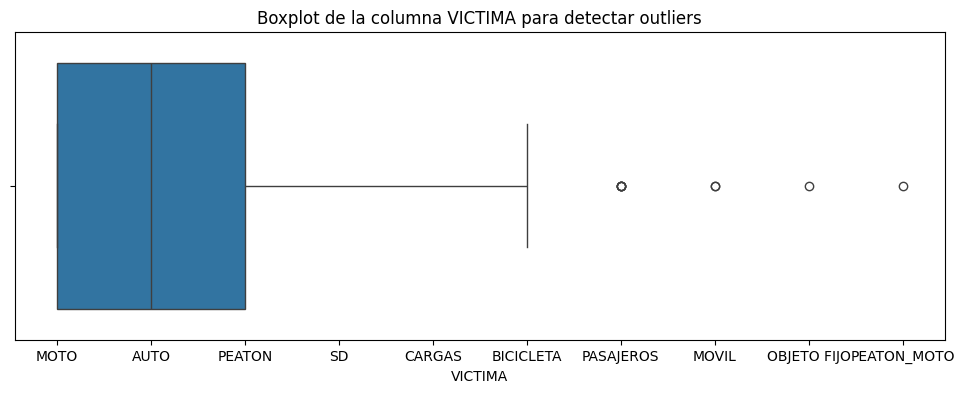

In [16]:
datos_victima = hechos['HECHOS']['VICTIMA']

# Crear el gráfico de caja
plt.figure(figsize=(12, 4))
sns.boxplot(x=datos_victima)

# Personalizar el gráfico
plt.xlabel('VICTIMA')
plt.title('Boxplot de la columna VICTIMA para detectar outliers')

# Mostrar el gráfico
plt.show()



En la columna 'VICTIMA' encontramos dos valores outliers los cuales son: PEATON_MOTO Y OBJETO FIJO. estos no son considerados victimas ya que no se encuentra su descripcion dentro del diccionario de hechos.
Muestro la cantidad de Hechos por Victimas para conoser cuantos casos outliers tengo e identificos sus ID:

In [17]:
hechos['HECHOS']['VICTIMA'].value_counts()

VICTIMA
MOTO           295
PEATON         263
AUTO            83
BICICLETA       29
SD               8
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64

Identificos los ID y los guardo en una lista

In [18]:
# Filtrar las filas en HECHOS que coincidan con las condiciones
filas_victimas_especificas = hechos['HECHOS'][(hechos['HECHOS']['VICTIMA'] == 'PEATON_MOTO') | (hechos['HECHOS']['VICTIMA'] == 'OBJETO FIJO')]

# Obtener una lista de los ID de las filas filtradas
lista_ids = filas_victimas_especificas['ID'].tolist()

# Imprimir la lista de IDs
print(lista_ids)


['2017-0108', '2020-0063']


Busco los Id de los hecho en la tabla VICTIMAS para cruzar informacion y confirmar el tipo de victima

In [19]:
# Convertir la lista de IDs a un conjunto para una búsqueda más eficiente
conjunto_ids = set(lista_ids)

# Filtrar las filas en la pestaña "VICTIMAS" que tengan ID_hecho en la lista de IDs
filas_filtradas = hechos['VICTIMAS'][hechos['VICTIMAS']['ID_hecho'].isin(conjunto_ids)]

# Imprimir las filas filtradas
print(filas_filtradas)


      ID_hecho      FECHA  AAAA  MM  DD                   ROL VICTIMA  \
237  2017-0108 2017-09-02  2017   9   2  PASAJERO_ACOMPAÑANTE    AUTO   
238  2017-0108 2017-09-02  2017   9   2  PASAJERO_ACOMPAÑANTE    AUTO   
602  2020-0063 2020-12-05  2020  12   5                PEATON  PEATON   
603  2020-0063 2020-12-05  2020  12   5  PASAJERO_ACOMPAÑANTE    MOTO   

          SEXO EDAD  FECHA_FALLECIMIENTO  
237  MASCULINO   17  2017-09-02 00:00:00  
238  MASCULINO   10  2017-09-02 00:00:00  
602  MASCULINO   38  2020-12-05 00:00:00  
603  MASCULINO   21  2020-12-05 00:00:00  


Se puede detectar un error en el hecho de Id 2017-0108 donde la tabla HECHO se refleja que la víctima es un objeto físico y en la tabla Victimas nos dice que es AUTO, por lo que se corregirá el error. Mientras tanto el ID 2020-0063 se trata de un hecho real, pues se entiende que hubieron dos víctimas (peatón y acompañante de la moto) por esto en la tabla HECHOS donde se describe lo sucedido un una sola fila se muestra el tipo de victima como: 'PEATON_MOTO'

In [20]:
# Buscar la fila con ID '2017-0108' en la pestaña 'HECHOS'
fila_a_modificar = hechos['HECHOS'][hechos['HECHOS']['ID'] == '2017-0108']

# Modificar los valores de las columnas VICTIMA y ACUSADO
hechos['HECHOS'].loc[fila_a_modificar.index, 'VICTIMA'] = 'AUTO'
hechos['HECHOS'].loc[fila_a_modificar.index, 'ACUSADO'] = 'OBJETO FIJO'

Guardo el Datasets limpio

In [22]:
hechos['HECHOS'].to_excel('../Datasets/homicidios_limpio_HECHOS.xlsx', index=False)
hechos['VICTIMAS'].to_excel('../Datasets/homicidios_limpio_VICTIMAS.xlsx', index=False)